In [1]:
# import Data
import opendatasets as od

# Data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from matplotlib import rcParams

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoLars, LinearRegression, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply

import warnings
warnings.filterwarnings("ignore")

from decimal import *

alpha = 0.05
rcParams['figure.figsize'] = 16,8
sns.set(font_scale=1.5)

#local Library
import acquire
import utilities

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Acquire data from .py file
# Need Kaggle api token
# For information on kaggle api visit: https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/
admin = acquire.acquire_admissions()

In [3]:
# Visualize information
admin.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.50,4.50,9.65,1,0.92
1,324,107,4,4.00,4.50,8.87,1,0.76
2,316,104,3,3.00,3.50,8.00,1,0.72
3,322,110,3,3.50,2.50,8.67,1,0.80
4,314,103,2,2.00,3.00,8.21,0,0.65


In [4]:
admin['n']=np.arange(len(admin))

In [5]:
# Check for Null/missing data
admin.shape

(500, 9)

In [6]:
admin.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,n
0,337,118,4,4.50,4.50,9.65,1,0.92,0
1,324,107,4,4.00,4.50,8.87,1,0.76,1
2,316,104,3,3.00,3.50,8.00,1,0.72,2
3,322,110,3,3.50,2.50,8.67,1,0.80,3
4,314,103,2,2.00,3.00,8.21,0,0.65,4


In [7]:
# Check null/missing
admin.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
n                    0
dtype: int64

In [8]:
admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
 8   n                  500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
admin = admin.replace(r'^\s*$', np.nan, regex=True)
admin.columns = admin.columns.str.replace(' ','')
admin.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,n
0,337,118,4,4.50,4.50,9.65,1,0.92,0
1,324,107,4,4.00,4.50,8.87,1,0.76,1
2,316,104,3,3.00,3.50,8.00,1,0.72,2
3,322,110,3,3.50,2.50,8.67,1,0.80,3
4,314,103,2,2.00,3.00,8.21,0,0.65,4


In [10]:
admin.describe().T

,count,mean,std,min,25%,50%,75%,max
GREScore,500.00,316.47,11.30,290.00,308.00,317.00,325.00,340.00
TOEFLScore,500.00,107.19,6.08,92.00,103.00,107.00,112.00,120.00
UniversityRating,500.00,3.11,1.14,1.00,2.00,3.00,4.00,5.00
SOP,500.00,3.37,0.99,1.00,2.50,3.50,4.00,5.00
LOR,500.00,3.48,0.93,1.00,3.00,3.50,4.00,5.00
CGPA,500.00,8.58,0.60,6.80,8.13,8.56,9.04,9.92
Research,500.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
ChanceofAdmit,500.00,0.72,0.14,0.34,0.63,0.72,0.82,0.97
n,500.00,249.50,144.48,0.00,124.75,249.50,374.25,499.00


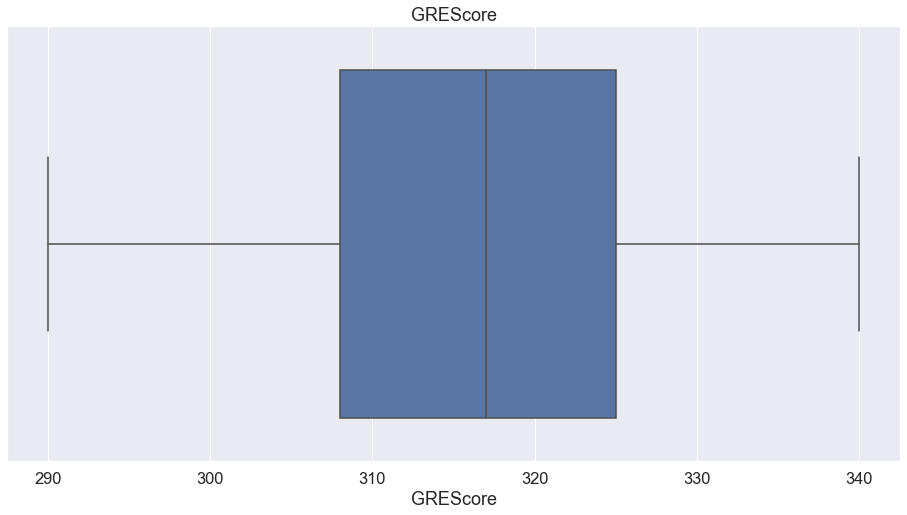

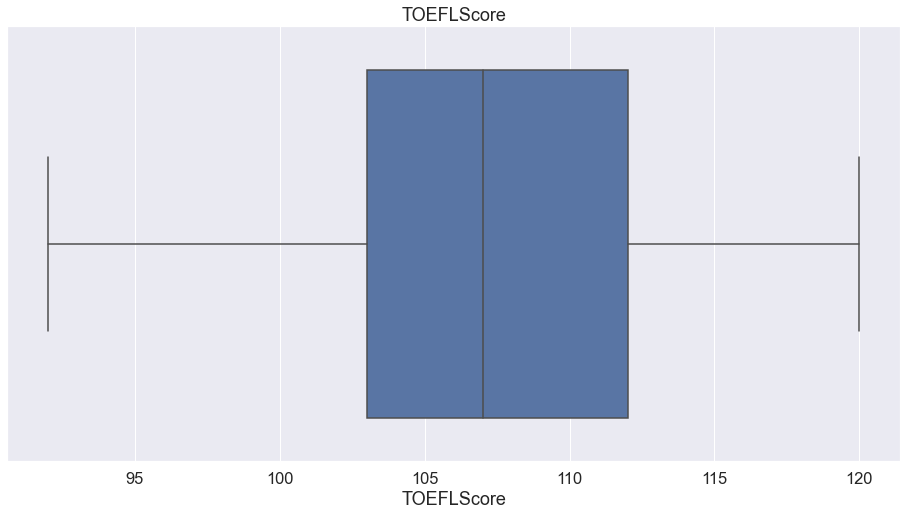

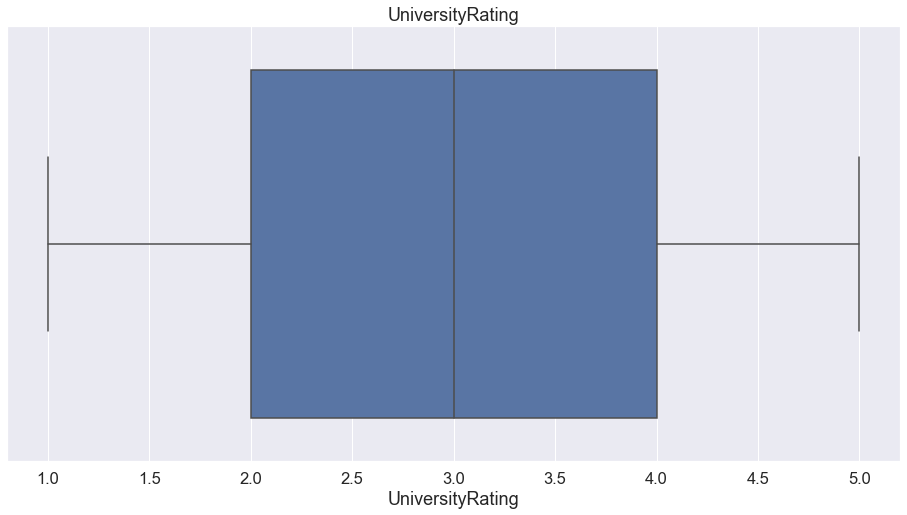

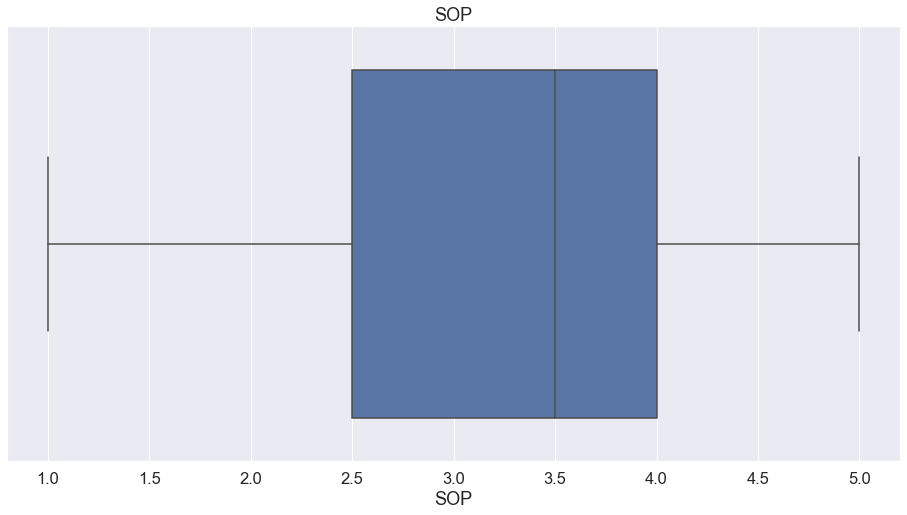

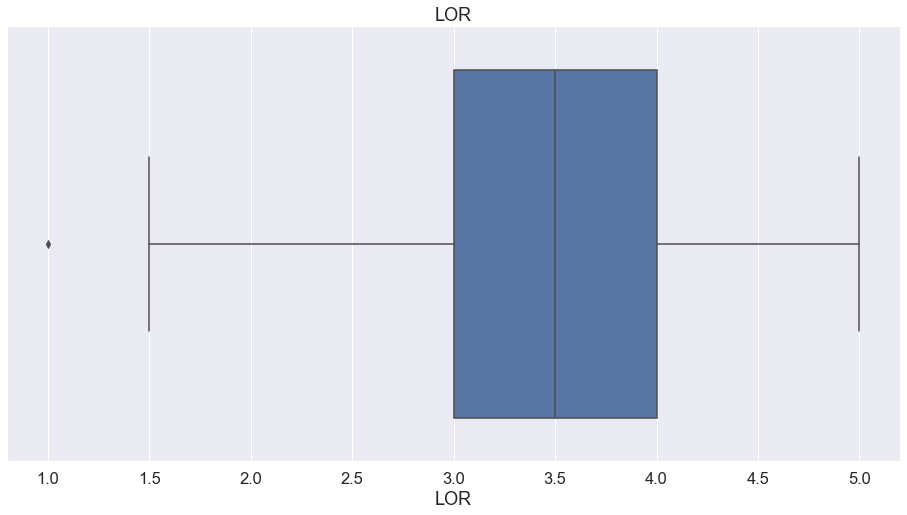

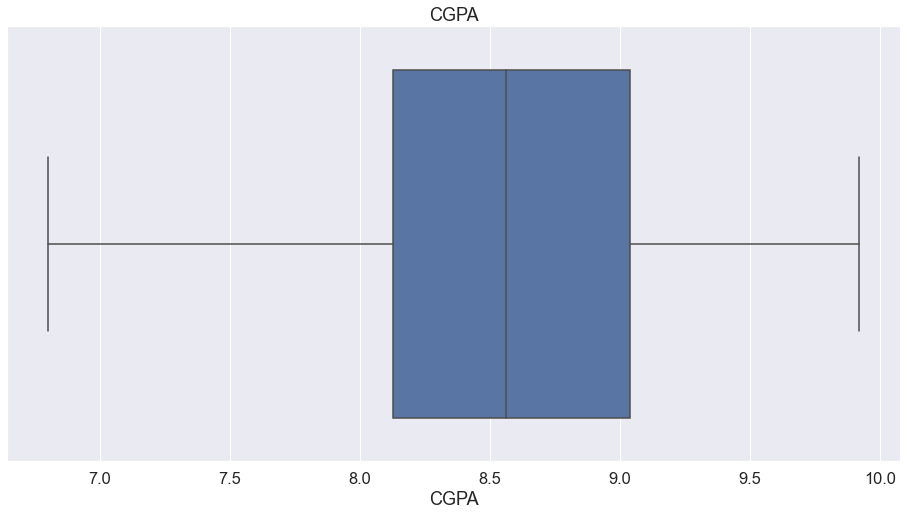

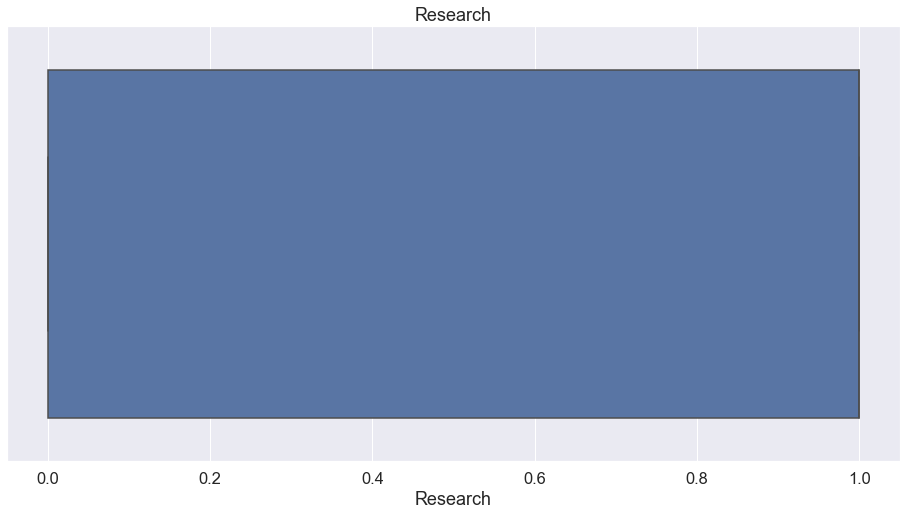

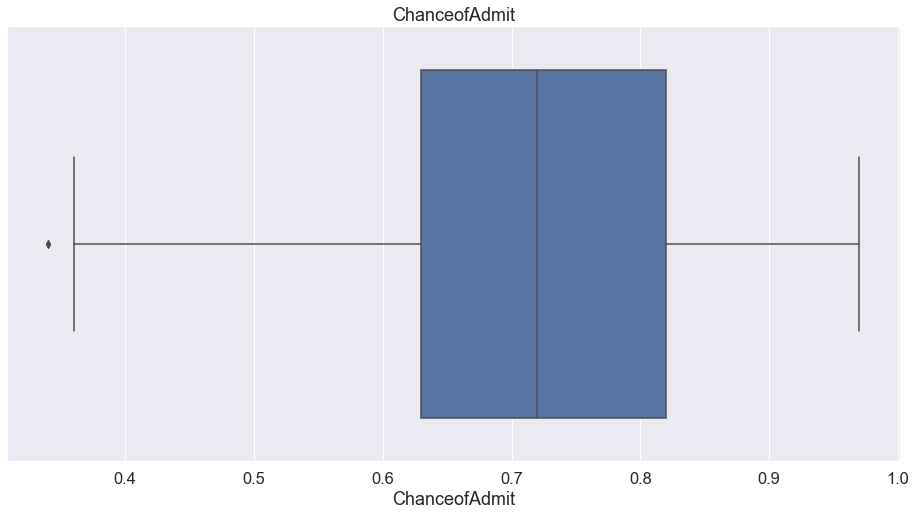

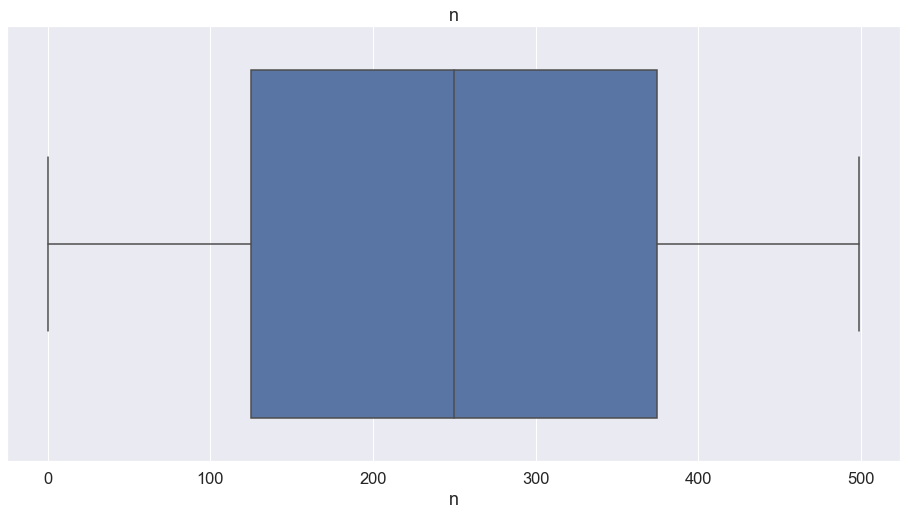

In [11]:
for col in admin.select_dtypes('number'):
    sns.boxplot(admin[col])
    plt.title(col)
    plt.show()

In [12]:
admin_tidy = admin.melt(id_vars = ['n'], var_name='scores')

In [13]:
admin_tidy.head()

,n,scores,value
0,0,GREScore,337.00
1,1,GREScore,324.00
2,2,GREScore,316.00
3,3,GREScore,322.00
4,4,GREScore,314.00


## EDA
-Univariate
-Bivariate
-Multivariate
-Questions

In [14]:
admin.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit', 'n'],
      dtype='object')

In [15]:
admin.SOP.value_counts()

4.00    89
3.50    88
3.00    80
2.50    64
4.50    63
2.00    43
5.00    42
1.50    25
1.00     6
Name: SOP, dtype: int64

In [16]:
#Definitions First
columns = ['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research']
target = ['ChanceofAdmit']
targets = ['ChanceofAdmit']
categorical = ['UniversityRating','Research']
continuous = ['GREScore', 'TOEFLScore','LOR','CGPA']

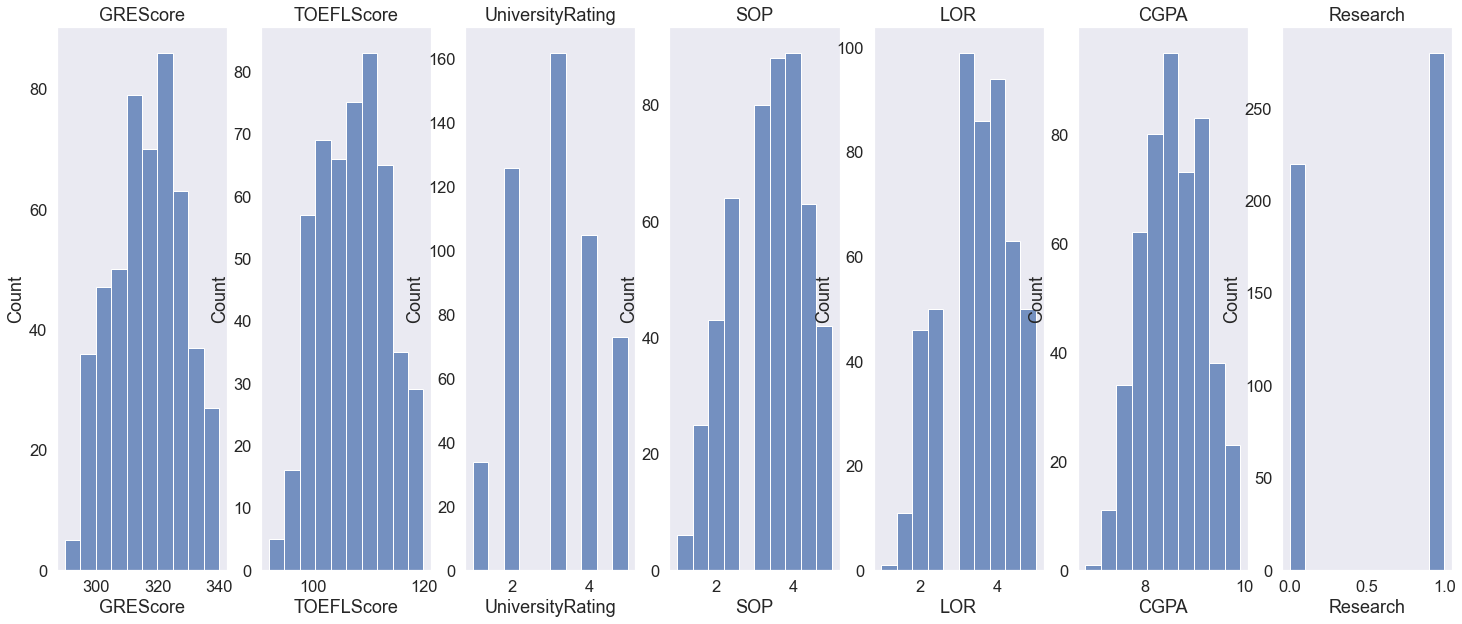

In [17]:
utilities.plot_histograms(admin, columns)

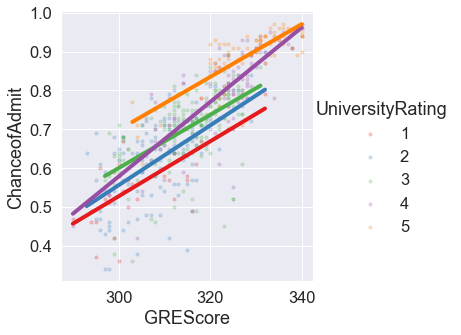

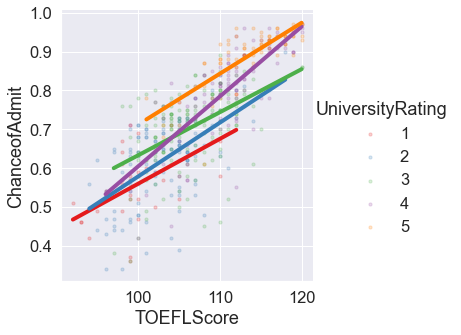

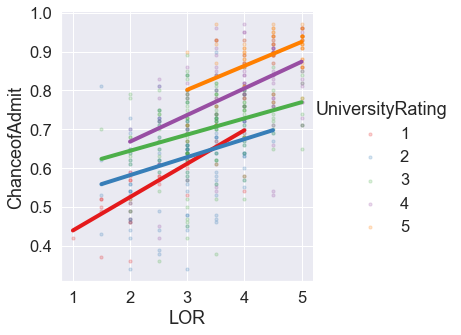

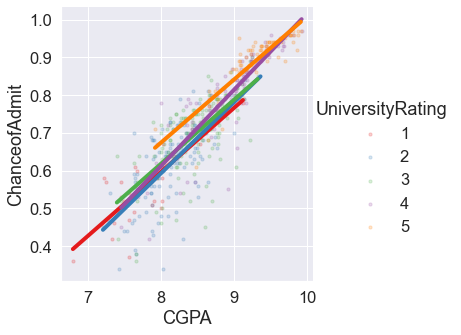

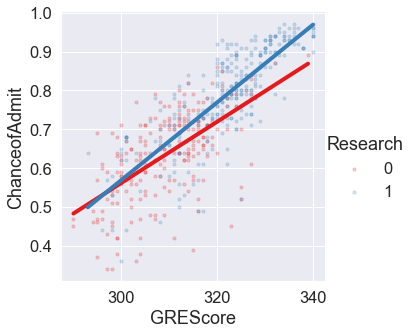

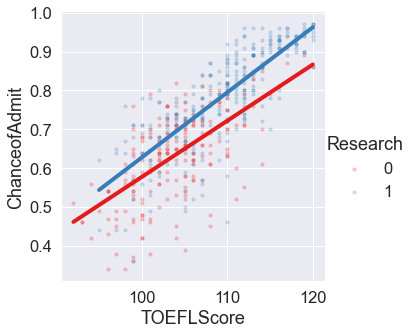

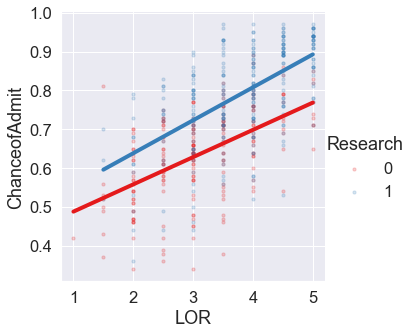

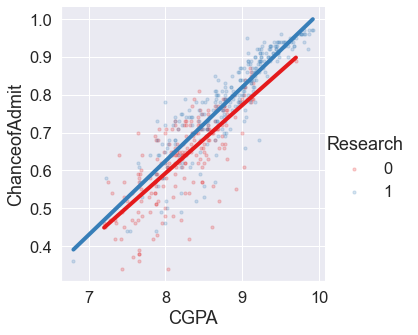

In [18]:
utilities.plot_variable_pairs(admin, continuous,categorical, targets, sample_amt=500)

Generating plots GREScore by UniversityRating


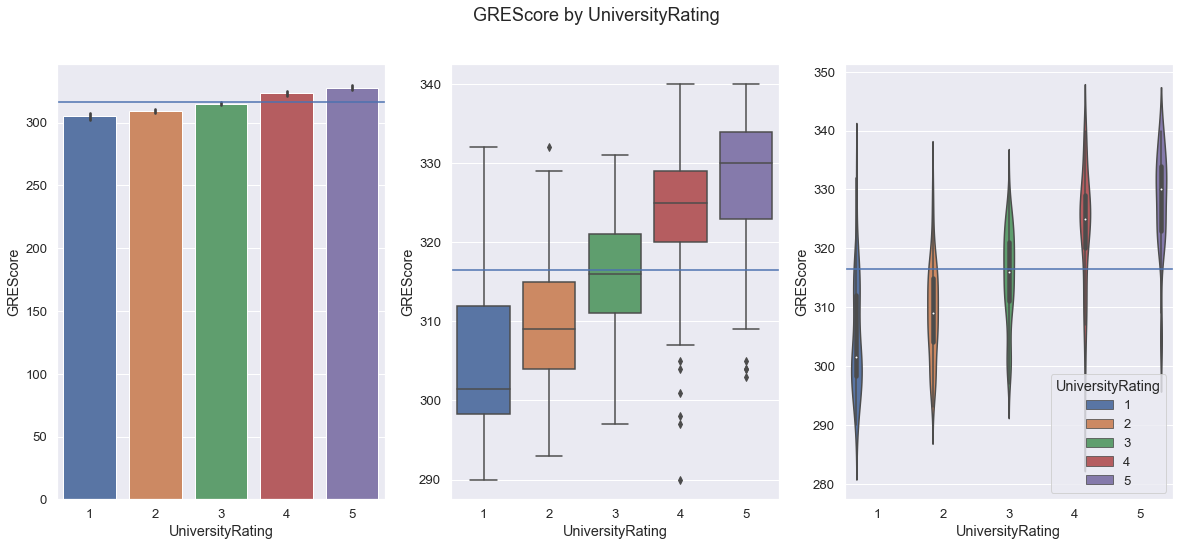

Generating plots GREScore by Research


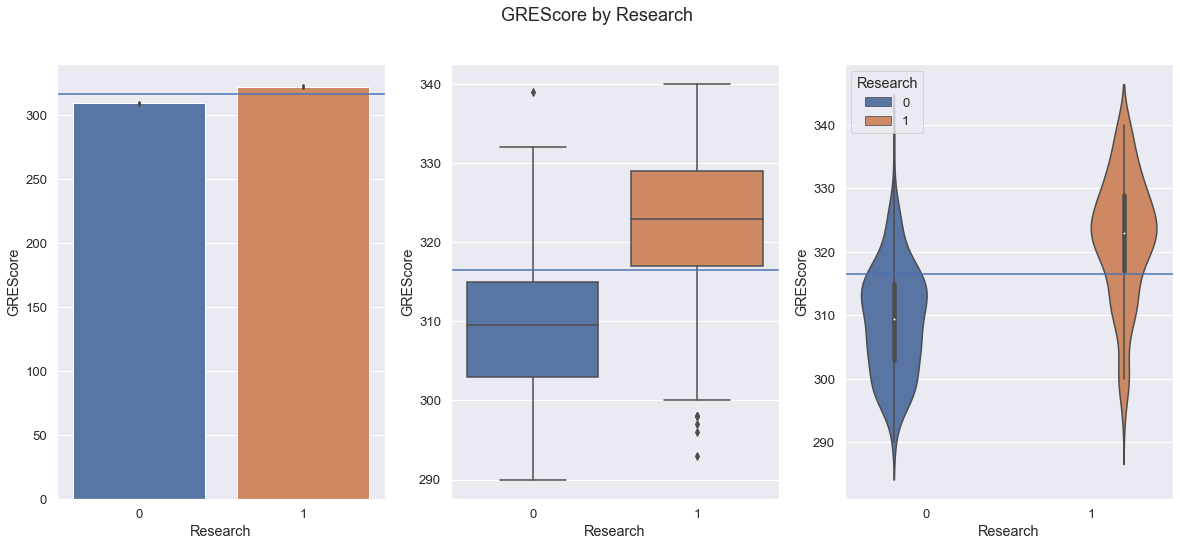

Generating plots TOEFLScore by UniversityRating


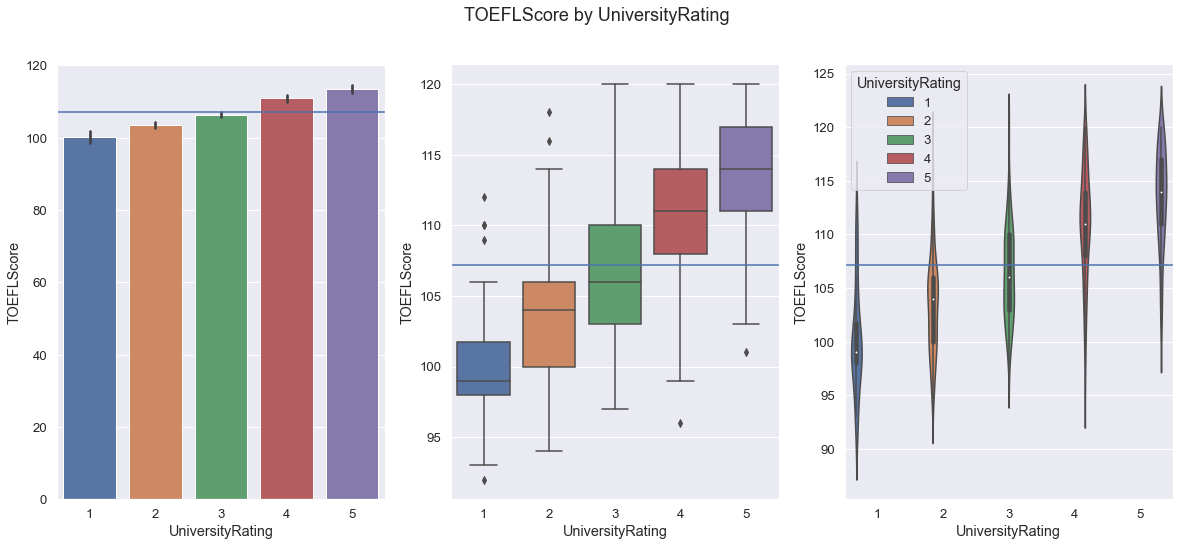

Generating plots TOEFLScore by Research


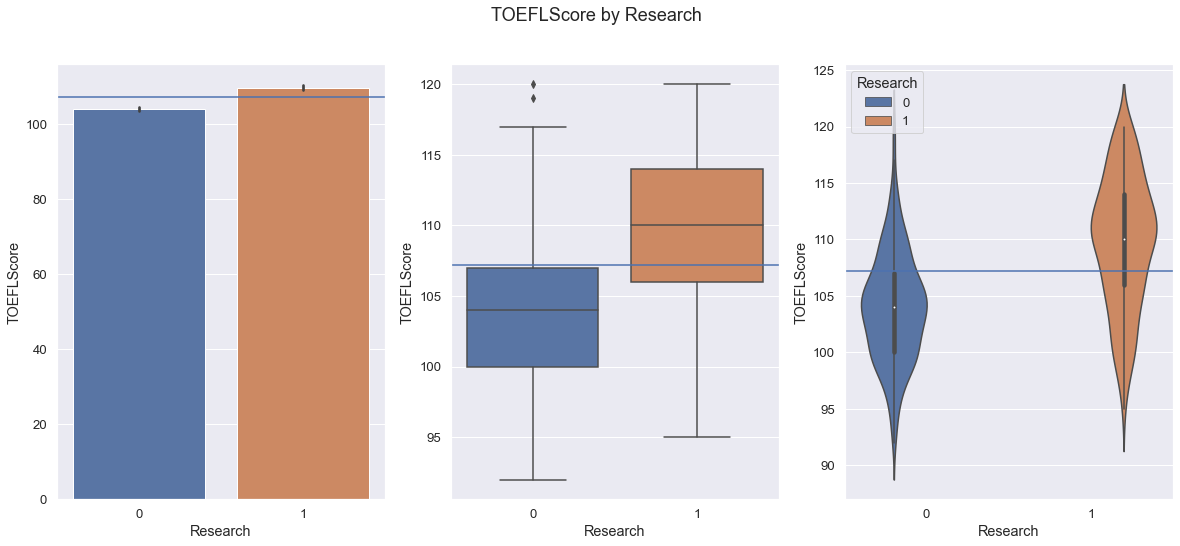

Generating plots LOR by UniversityRating


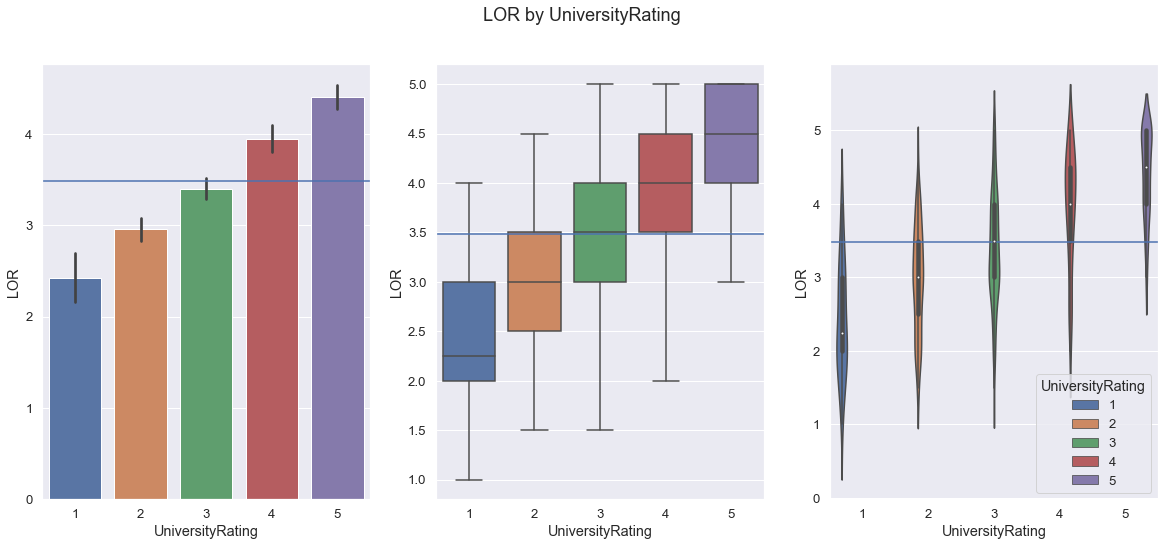

Generating plots LOR by Research


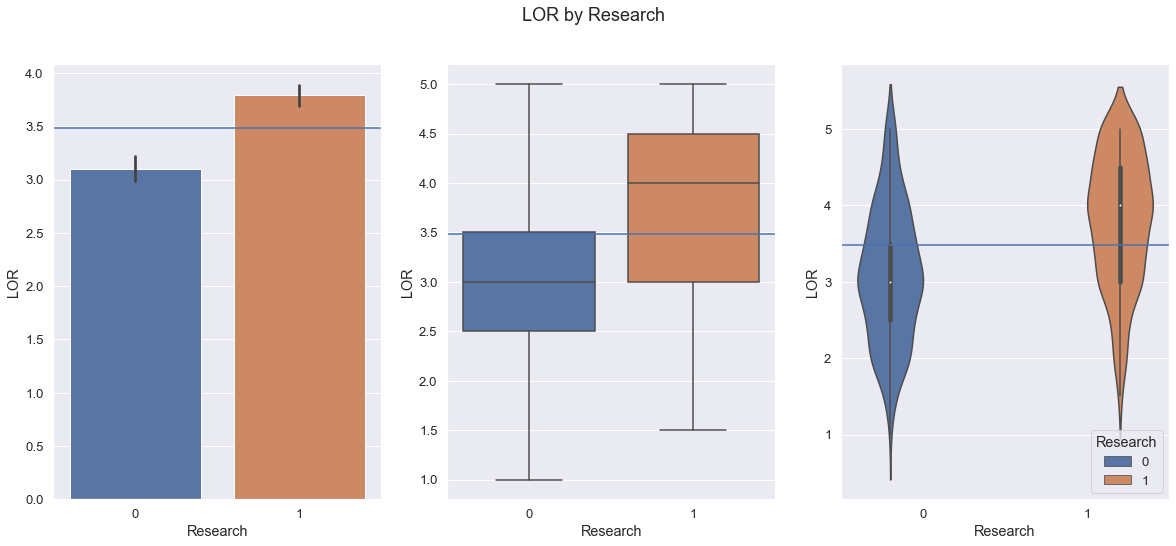

Generating plots CGPA by UniversityRating


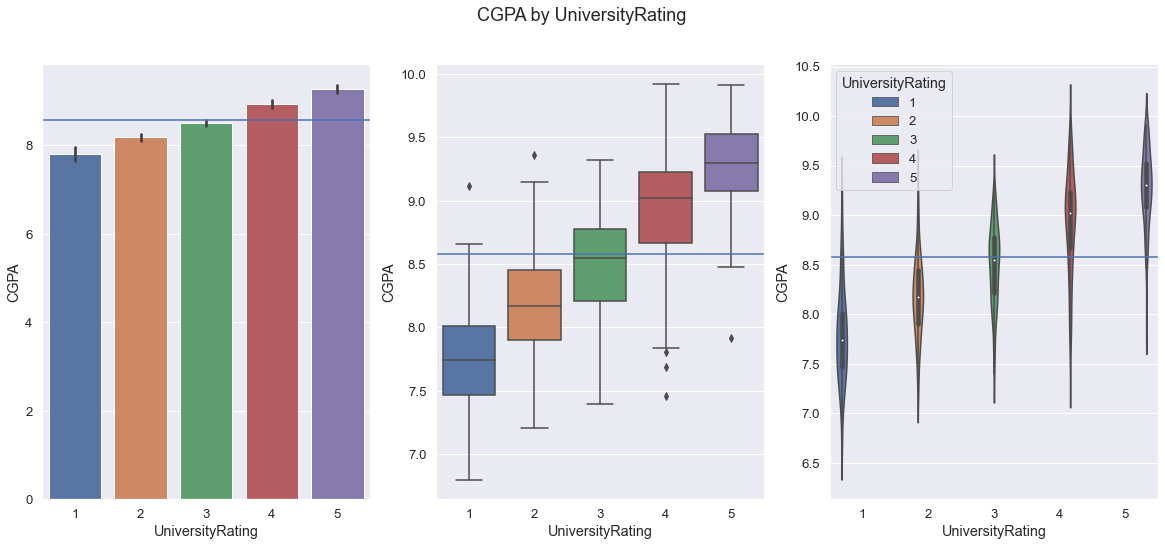

Generating plots CGPA by Research


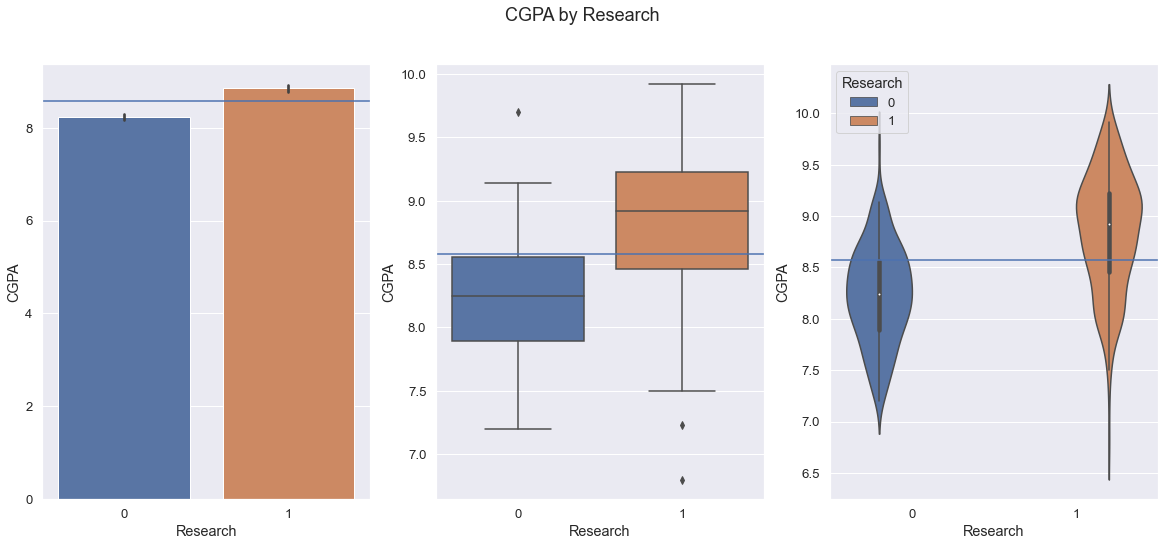

In [19]:
utilities.plot_categorical_and_continuous_vars(admin, categorical, continuous, sample_amt=500)